<a href="https://colab.research.google.com/github/dhanushpachabhatla/my-machine-learning-notes/blob/main/bagging_vs_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# bagging vs Random forest

Random Forest :
* Base Estimator -> Always decision trees.
* Goal -> Reduce variance further than bagging by de-correlating trees.
* Feature Selection -> Uses a random subset of features at each split.

Bagging :
* Base Estimator: Any (commonly decision trees).

* Goal: Reduce variance and prevent overfitting.

* Feature Selection: Uses all features when training base models.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-0.402183,-2.549923,1.803117,0.757166,-0.935914,0
1,-2.127042,1.819354,-1.147791,1.355094,1.256998,1
2,1.076393,-1.012731,0.717723,-1.911624,-1.890969,0
3,0.279438,-1.303944,0.031191,-1.359190,-1.411327,0
4,0.547378,1.508521,-1.627262,2.232865,0.415018,1


In [4]:
bag = BaggingClassifier(max_features=2)
bag.fit(df.iloc[:,:5],df.iloc[:,-1])

BaggingClassifier(max_features=2)

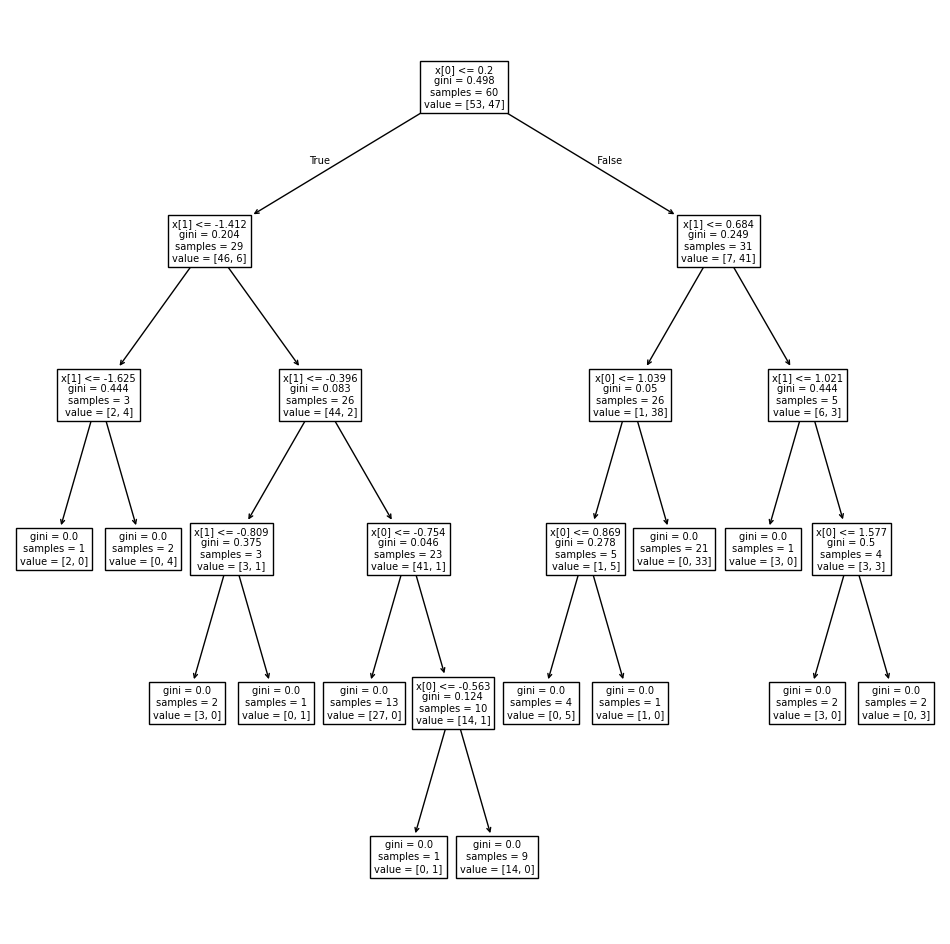

In [5]:
plt.figure(figsize=(12,12))
plot_tree(bag.estimators_[0])
plt.show()

* as you can see the whole tree has nodes either x[0] or x[1] which are fixed

In [6]:
rf = RandomForestClassifier(max_features=2)

In [7]:
rf.fit(df.iloc[:,:5],df.iloc[:,-1])

RandomForestClassifier(max_features=2)

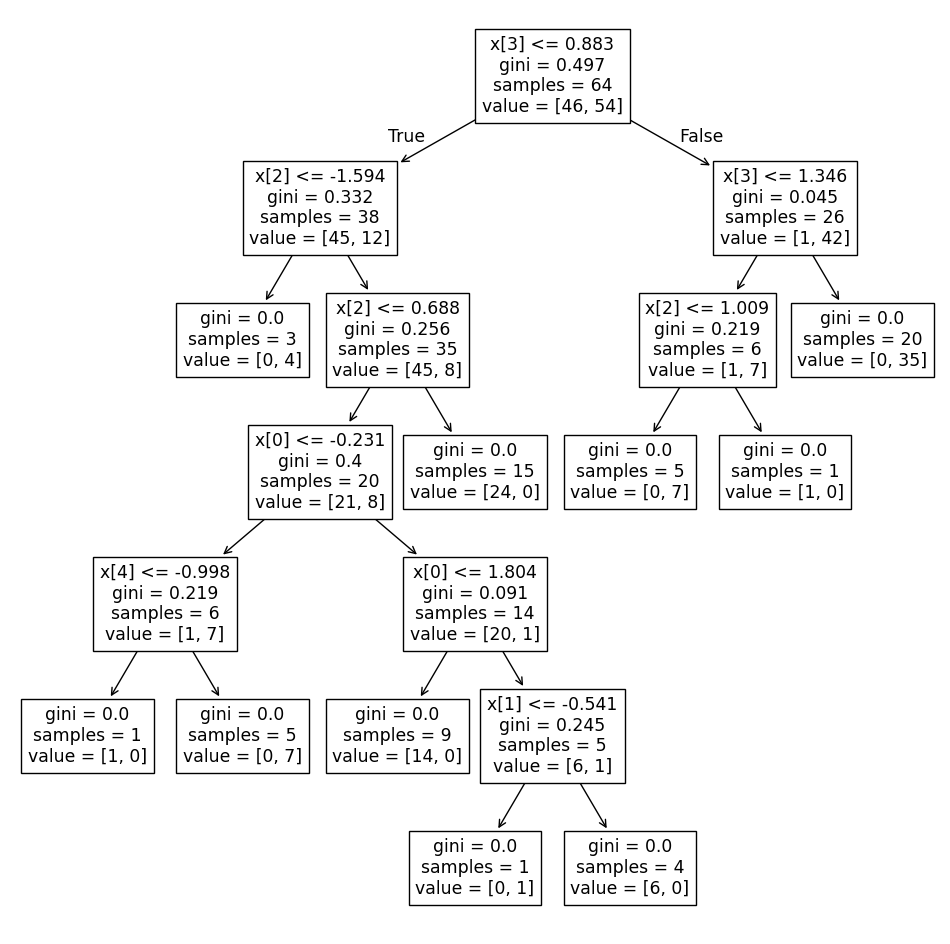

In [8]:
plt.figure(figsize=(12,12))
plot_tree(rf.estimators_[4])
plt.show()

* here we have more randomness as the features changes for each node, desitions are randomly distributed